<a href="https://colab.research.google.com/github/gnryu/DataScience_TermProject/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objective Setting**
predict severity of car accident

In [ ]:
# connect drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# read data
data = pd.read_csv('/content/drive/Shareddrives/DataScience_TermProject/US_Accidents_Dec21_updated.csv')
data=data.drop(columns='Number',axis=1)
column_names=data.columns.values.tolist()
print(column_names)

['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


## **Data Curation**
we are going to use only samples of certain city with well-stratified severity<br>
select data of *'City = Orlando'* stratified in *Severity* feature

In [ ]:
data.shape # sample: 2845342, feature: 46

(2845342, 46)

In [ ]:
from sklearn.model_selection import train_test_split
from pandas.core.frame import DataFrame

In [ ]:
print(data['Severity'].value_counts())
X=np.array(data)
y=np.array(data['Severity'])

#use stratify and check stratify rate
city_train,city_test,y_train,y_test=train_test_split(X,y,test_size=0.005,stratify=y)
print(DataFrame(y_test).value_counts()/len(DataFrame(y_test)))

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64
2    0.890209
3    0.054544
4    0.046110
1    0.009138
dtype: float64


In [ ]:
# check how many samples are in each city
print(data['City'].value_counts())

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64


In [ ]:
# check the distribution for each severity(1 ~ 4) in 'City = Miami' and rate
data_Miami=pd.DataFrame.copy(data[data['City']=='Miami'])
print(data_Miami['Severity'].value_counts())
X=np.array(data_Miami)
y=np.array(data_Miami['Severity'])
city_train1,city_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.1,stratify=y)
print(DataFrame(y_test1).value_counts()/len(DataFrame(y_test1)))
print()
print(len(city_test1))

2    102955
3      2379
4      1580
1        52
Name: Severity, dtype: int64
2    0.962513
3    0.022249
4    0.014770
1    0.000467
dtype: float64

10697


In [ ]:
# check the distribution for each severity(1 ~ 4) in 'City = Los Angeles' and rate
data_LA=pd.DataFrame.copy(data[data['City']=='Los Angeles'])
print(data_LA['Severity'].value_counts())
X=np.array(data_LA)
y=np.array(data_LA['Severity'])
city_train2,city_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.15,stratify=y)
print(DataFrame(y_test2).value_counts()/len(DataFrame(y_test2)))
print()
print(len(city_test2))

2    66220
3     2010
4      726
Name: Severity, dtype: int64
2    0.960363
3    0.029099
4    0.010538
dtype: float64

10344


In [ ]:
# check the distribution for each severity(1 ~ 4) in 'City = Orlando' and rate
data_Orlando=pd.DataFrame.copy(data[data['City']=='Orlando'])
print(data_Orlando['Severity'].value_counts())
X=np.array(data_Orlando)
y=np.array(data_Orlando['Severity'])
city_train3,city_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.2,stratify=y)
print(DataFrame(y_test3).value_counts()/len(DataFrame(y_test3)))
print()
print(len(city_test3))

2    52313
3      996
4      927
1      455
Name: Severity, dtype: int64
2    0.956486
3    0.018192
4    0.017003
1    0.008319
dtype: float64

10939


In [ ]:
# we are going to see only 'City = Orlando' data
data_Orlando=pd.DataFrame(city_test3,columns=column_names)
print(data_Orlando.shape)

(10939, 46)


## **Data Inspection**

In [ ]:
#turn back columns type and check because the data type was changed from spilt and making it dataframe again
data_Orlando = data_Orlando.infer_objects()
print(data_Orlando.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10939 entries, 0 to 10938
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10939 non-null  object 
 1   Severity               10939 non-null  int64  
 2   Start_Time             10939 non-null  object 
 3   End_Time               10939 non-null  object 
 4   Start_Lat              10939 non-null  float64
 5   Start_Lng              10939 non-null  float64
 6   End_Lat                10939 non-null  float64
 7   End_Lng                10939 non-null  float64
 8   Distance(mi)           10939 non-null  float64
 9   Description            10939 non-null  object 
 10  Street                 10939 non-null  object 
 11  Side                   10939 non-null  object 
 12  City                   10939 non-null  object 
 13  County                 10939 non-null  object 
 14  State                  10939 non-null  object 
 15  Zi

In [ ]:
data_Orlando.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-551251,2,2021-11-03 15:52:33,2021-11-03 18:31:16,28.428795,-81.407121,28.427453,-81.404810,0.168,Slow traffic on US-92 W - US-441 S - US-17 S f...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-1493185,2,2021-06-30 17:21:24,2021-06-30 19:25:02,28.598563,-81.417272,28.598462,-81.415646,0.099,Stationary traffic on FL-423 - US-441 S from N...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-801907,2,2021-05-27 23:11:00,2021-05-28 00:02:00,28.487990,-81.310066,28.493665,-81.310109,0.392,Stationary traffic on FL-436 from FL-15/Hoffne...,...,False,True,False,False,False,False,Night,Night,Night,Night
3,A-683112,2,2021-03-03 12:32:00,2021-03-03 15:05:18,28.524240,-81.323287,28.524244,-81.322255,0.063,Incident on CURRY FORD RD near LOCKWOOD AVE Dr...,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-683111,2,2021-12-21 18:49:00,2021-12-21 20:19:43,28.524277,-81.318659,28.524280,-81.318200,0.028,Incident on CURRY FORD RD near FREDRICA DR Exp...,...,False,False,False,False,False,False,Night,Night,Night,Day


In [ ]:
data_Orlando['Severity'].value_counts()

2    10463
3      199
4      186
1       91
Name: Severity, dtype: int64

In [ ]:
data_Orlando['Weather_Condition'].value_counts()

Fair                            4452
Mostly Cloudy                   2331
Partly Cloudy                   1319
Cloudy                           954
Light Rain                       524
Clear                            320
Thunder                          160
Scattered Clouds                 145
Thunder in the Vicinity           99
Light Rain with Thunder           93
Heavy T-Storm                     77
Overcast                          77
Rain                              71
Fog                               53
T-Storm                           52
Heavy Rain                        42
Fair / Windy                      22
Partly Cloudy / Windy             18
Mostly Cloudy / Windy             18
Patches of Fog                    15
Haze                              14
Thunderstorm                      12
Shallow Fog                        8
Cloudy / Windy                     6
Heavy Thunderstorms and Rain       5
Heavy T-Storm / Windy              4
Light Thunderstorms and Rain       4
L

In [ ]:
#The index of the dataframe is replaced with an integer default index
dtype_df = data_Orlando.dtypes.reset_index()
#check the columns type
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,ID,object
1,Severity,int64
2,Start_Time,object
3,End_Time,object
4,Start_Lat,float64
5,Start_Lng,float64
6,End_Lat,float64
7,End_Lng,float64
8,Distance(mi),float64
9,Description,object


In [ ]:
#The index of the dataframe is replaced with an integer default index
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,bool,13
1,int64,1
2,float64,12
3,object,20


In [ ]:
# to check outlier
print(data_Orlando.describe())

           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  10939.000000  10939.000000  10939.000000  10939.000000  10939.000000   
mean       2.043880     28.505635    -81.391375     28.505705    -81.391181   
std        0.304314      0.350882      0.088918      0.351195      0.089322   
min        1.000000     28.347330    -81.596780     28.257840    -81.596855   
25%        2.000000     28.449055    -81.458446     28.449837    -81.457843   
50%        2.000000     28.493792    -81.404785     28.494431    -81.404766   
75%        2.000000     28.552403    -81.364446     28.552968    -81.363912   
max        4.000000     38.914850    -80.576187     38.963200    -80.515337   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  10939.000000    10898.000000    9955.000000  10898.000000   
mean       0.283241       75.956561      75.873029     68.196458   
std        0.524162        9.752567       9.841688     17.795681   
min        0.000

In [ ]:
#add percentile to check in detail
data_Orlando.describe(percentiles = [.1, .99])

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,10939.000000,10939.000000,10939.000000,10939.000000,10939.000000,10939.000000,10898.000000,9955.000000,10898.000000,10908.000000,10896.000000,10821.000000,10102.000000
mean,2.043880,28.505635,-81.391375,28.505705,-81.391181,0.283241,75.956561,75.873029,68.196458,29.949408,9.603754,8.363478,0.010569
std,0.304314,0.350882,0.088918,0.351195,0.089322,0.524162,9.752567,9.841688,17.795681,0.137219,1.594915,4.570952,0.070838
min,1.000000,28.347330,-81.596780,28.257840,-81.596855,0.000000,18.000000,5.000000,14.000000,28.440000,0.000000,0.000000,0.000000
10%,2.000000,28.400720,-81.477790,28.400431,-81.477660,0.020000,63.000000,63.000000,45.000000,29.790000,10.000000,3.000000,0.000000
50%,2.000000,28.493792,-81.404785,28.494431,-81.404766,0.139000,77.000000,77.000000,68.000000,29.950000,10.000000,8.000000,0.000000
99%,4.000000,28.625454,-81.123618,28.625546,-81.121865,2.824000,93.000000,93.000000,100.000000,30.260000,10.000000,20.000000,0.290000
max,4.000000,38.914850,-80.576187,38.963200,-80.515337,10.280000,96.100000,96.000000,100.000000,30.600000,10.000000,28.000000,1.820000


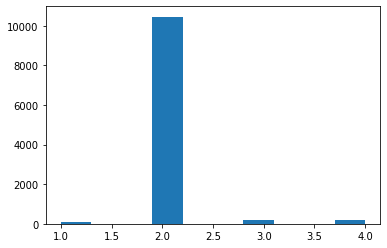

In [ ]:
#show severity as graph
import matplotlib.pyplot as plt
plt.hist(data_Orlando['Severity'])
plt.show()

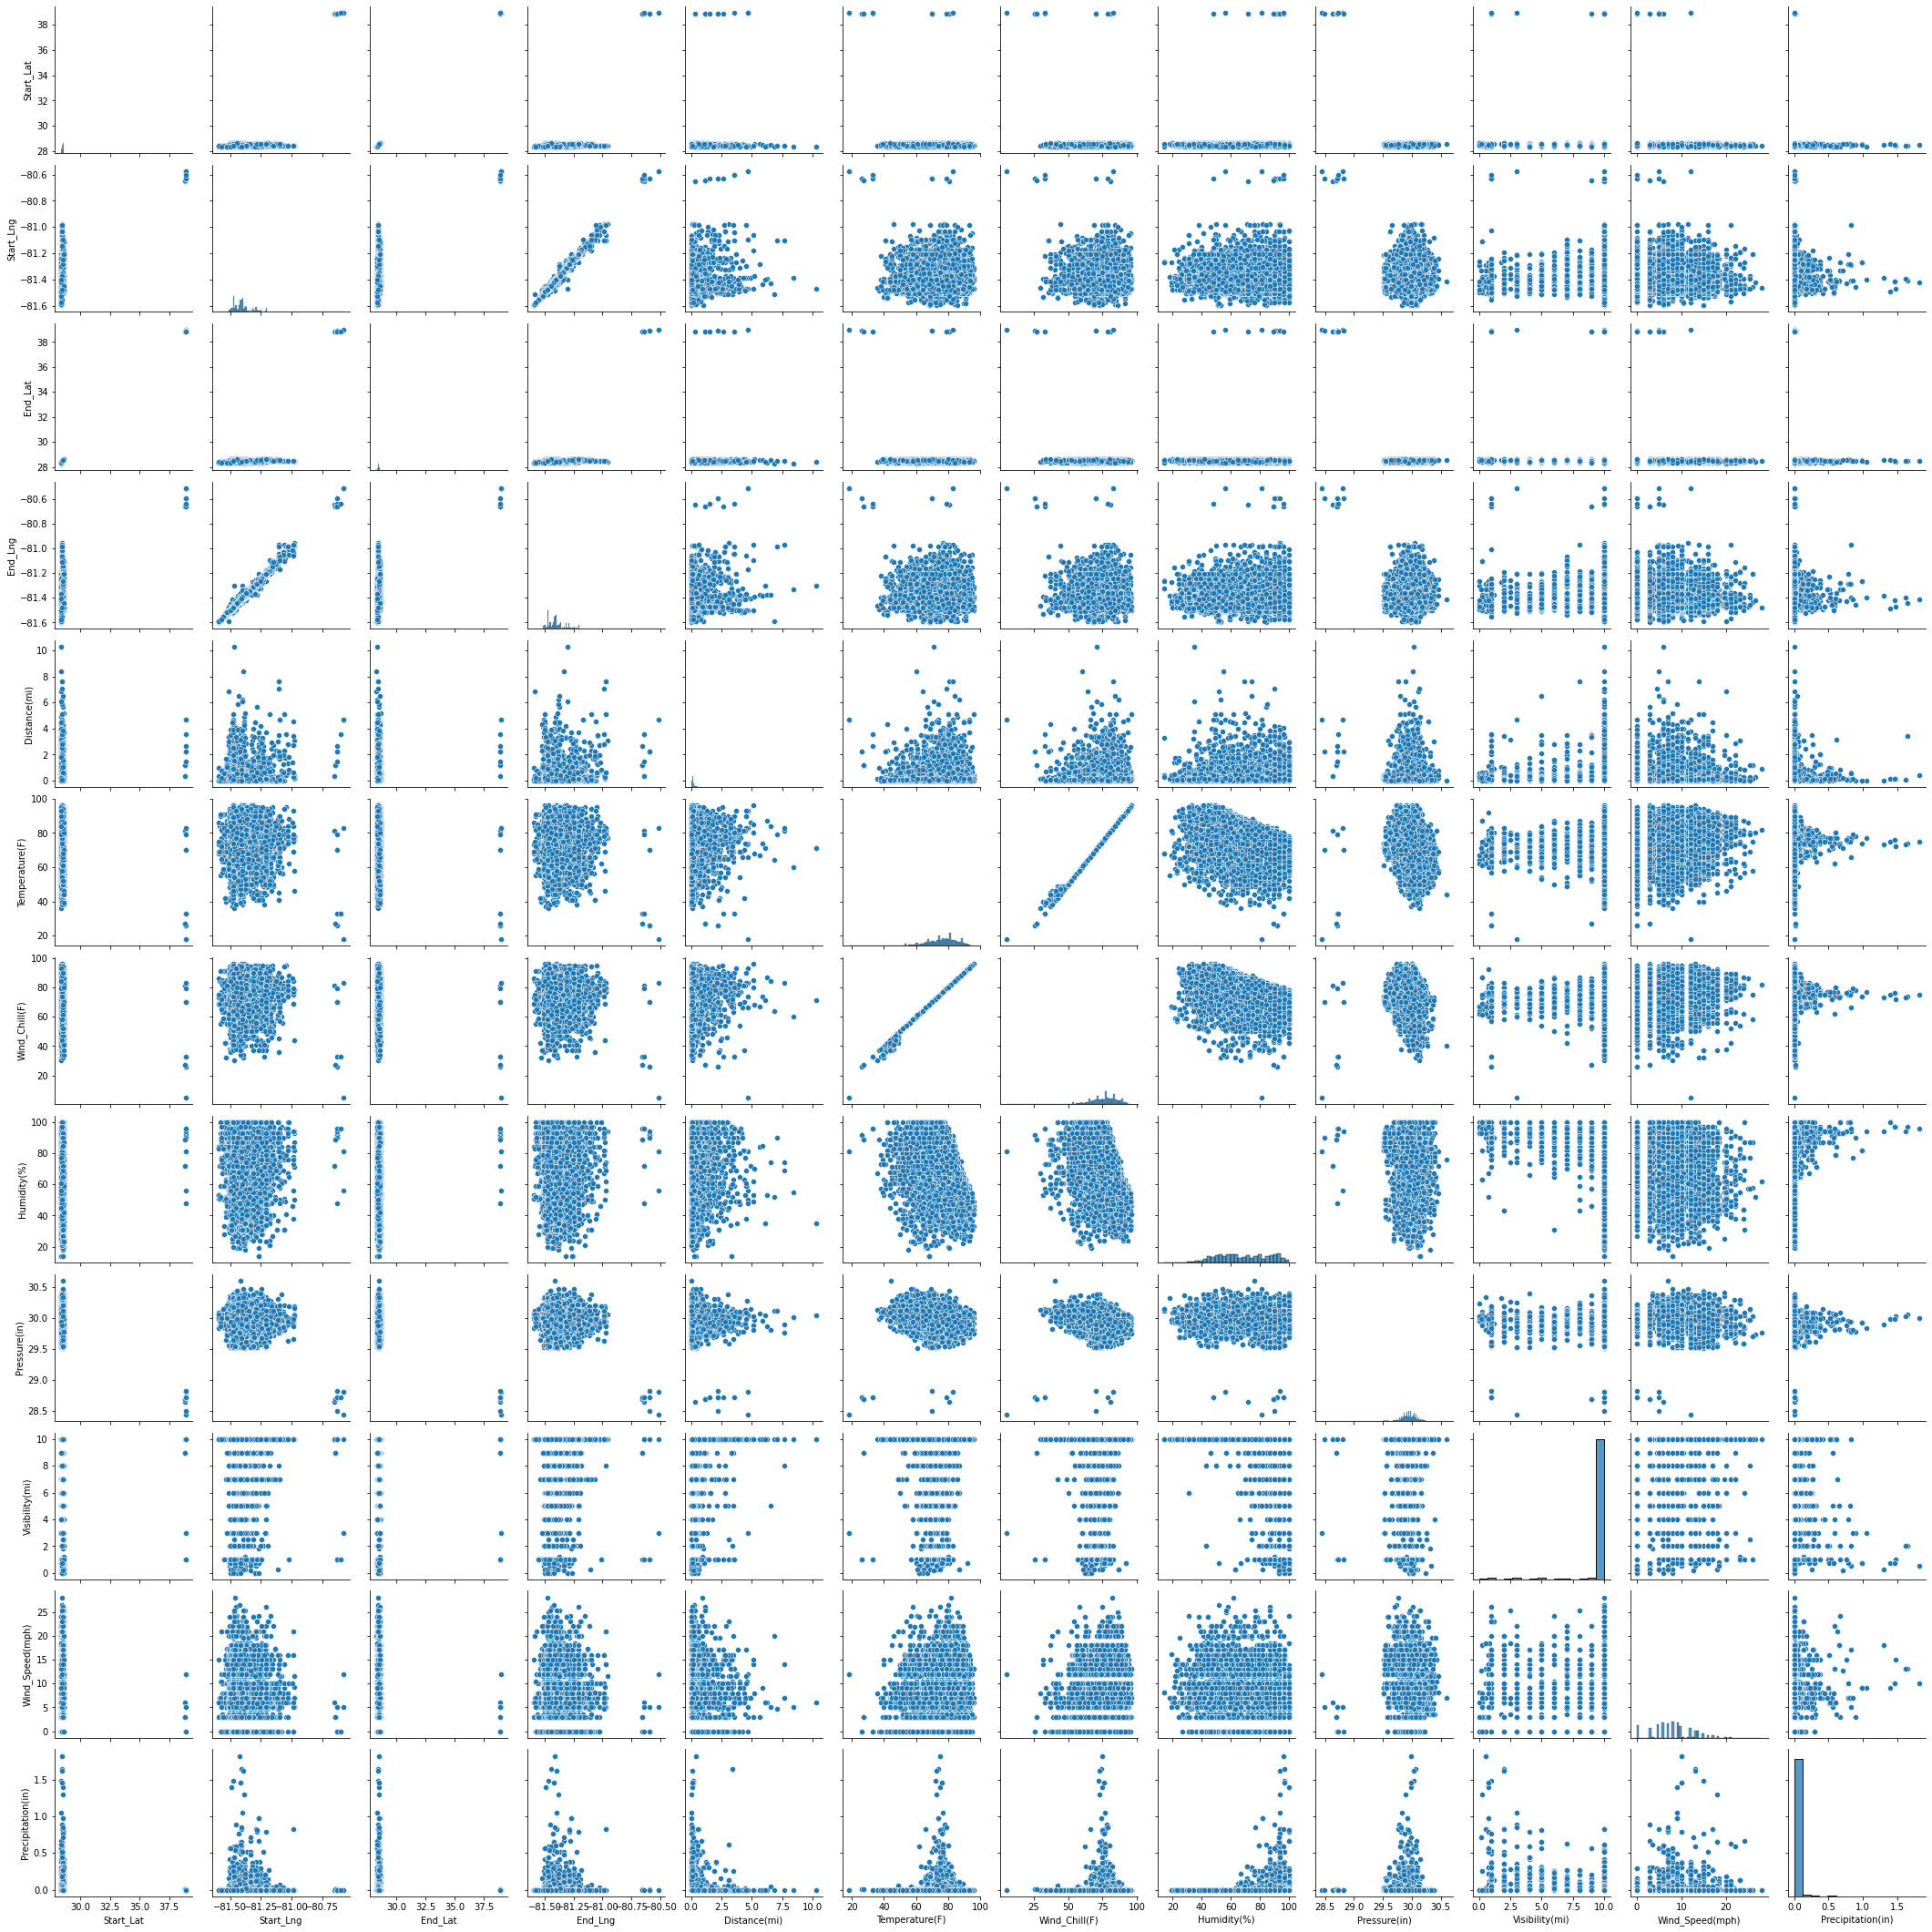

In [ ]:
#use pairplot to check correlation of each columns
import seaborn as sns
sns.pairplot(data_Orlando.loc[:,data_Orlando.dtypes == 'float64'])
plt.show()

## **Data Preprocessing**

cleaning dirty data

In [ ]:
# drop the sample with missing value
print(data_Orlando.isna().sum())
#drop row that include null data because difficult to fill  missing values
data_Orlando.dropna(axis=0,subset=['Precipitation(in)','Temperature(F)','Pressure(in)','Wind_Direction','Wind_Speed(mph)','Weather_Condition','Visibility(mi)'],inplace=True)
print('\nafter drop\n')
#check if drop is successful
print(data_Orlando.isna().sum())
print()
print(len(data_Orlando))

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat                    0
End_Lng                    0
Distance(mi)               0
Description                0
Street                     0
Side                       0
City                       0
County                     0
State                      0
Zipcode                    0
Country                    0
Timezone                   0
Airport_Code               0
Weather_Timestamp         21
Temperature(F)            41
Wind_Chill(F)            984
Humidity(%)               41
Pressure(in)              31
Visibility(mi)            43
Wind_Direction            43
Wind_Speed(mph)          118
Precipitation(in)        837
Weather_Condition         32
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit       



```
# 코드로 형식 지정됨
```

feature reduction

In [ ]:
# remove features with redundant value
# remove unnecessary features like 'ID'
data_Orlando.drop(axis=1,columns = ["ID", "Description", "City", "County", "State", "Country", "Timezone"], inplace = True)
data_Orlando['Wind_Chill(F)'].fillna(data_Orlando['Temperature(F)'],inplace=True)
print(data_Orlando.isna().sum())
print(len(data_Orlando))

Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Street                   0
Side                     0
Zipcode                  0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
N

In [ ]:
# make new feature: 'Time_Duration(min)' from 'Start_Time' and 'End_Time'
data_Orlando['Start_Time'] = pd.to_datetime(data_Orlando['Start_Time'], errors='coerce')
data_Orlando['End_Time'] = pd.to_datetime(data_Orlando['End_Time'], errors='coerce')
data_Orlando['Time_Duration(min)']=round((data_Orlando['End_Time']-data_Orlando['Start_Time'])/np.timedelta64(1,'m'))
data_Orlando.drop(axis=1,columns = ["Start_Time",'End_Time','Weather_Timestamp'], inplace = True)

# make new feature: 'Lat' from 'Start_Lat' and 'End_Lat'
# make new feature: 'Lng' from 'Start_Lng' and 'End_Lng'
data_Orlando['Lat']=(data_Orlando['Start_Lat']+data_Orlando['End_Lat'])/2
data_Orlando['Lng']=(data_Orlando['Start_Lng']+data_Orlando['End_Lng'])/2
data_Orlando.drop(axis=1,columns = ["Start_Lat",'End_Lat','Start_Lng','End_Lng'], inplace = True)

print(data_Orlando)
column_names2=data_Orlando.columns.values.tolist()

       Severity  Distance(mi)                       Street Side     Zipcode  \
0             2         0.168                 Consulate Dr    L  32837-8359   
1             2         0.099         N Orange Blossom Trl    L       32808   
2             2         0.392               S Semoran Blvd    L  32822-1732   
3             2         0.063                  Bel Air Ave    R       32812   
4             2         0.028                  Fredrica Dr    R       32812   
...         ...           ...                          ...  ...         ...   
10933         2         0.000                 Ten Point Ln    L       32837   
10934         2         0.538         N Orange Blossom Trl    L       32810   
10936         2         0.223              World Center Dr    L  32821-5407   
10937         2         0.080               Turkey Lake Rd    L  32819-7423   
10938         2         1.044  Central Florida Greeneway N    R       32825   

      Airport_Code  Temperature(F)  Wind_Chill(F)  

feature selection

In [ ]:
# use only 1000 samples to get feature importance
X=np.array(data_Orlando)
y=np.array(data_Orlando['Severity'])
X_train4,X_test4,y_train4,y_test4=train_test_split(X,y,test_size=0.1,stratify=y)
print(len(X_train4))
print(len(X_test4))
print(len(y_train4))
print(len(y_test4))

9036
1004
9036
1004


In [ ]:
X_sample = pd.DataFrame(X_test4,columns = column_names2)
X_sample.columns

Index(['Severity', 'Distance(mi)', 'Street', 'Side', 'Zipcode', 'Airport_Code',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Time_Duration(min)', 'Lat', 'Lng'],
      dtype='object')

In [ ]:
X_sample = X_sample.infer_objects()
X_sample.dtypes

Severity                   int64
Distance(mi)             float64
Street                    object
Side                      object
Zipcode                   object
Airport_Code              object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway                     bool
Roundabout                  bool
Station                     bool
Stop                        bool
Traffic_Calming             bool
Traffic_Signal              bool
Turning_Loop                bool
Sunrise_Sunset            object
Civil_Twilight            object
Nautical_T

In [ ]:
from sklearn import preprocessing

# before getting feature importance,
# encode categorical features using Label Encoder
df_categorical_features = X_sample.select_dtypes(include = ['object'])
categorical_features = df_categorical_features.columns

le = preprocessing.LabelEncoder()
for i in range(len(categorical_features)):
  X_sample[categorical_features[i]] = le.fit_transform(X_sample[categorical_features[i]])

# scale float features using Standard Scaler
df_float_features = X_sample.select_dtypes(include = ['float64'])
float_features = df_float_features.columns

scaler = preprocessing.StandardScaler()
X_sample[float_features] = scaler.fit_transform(df_float_features[float_features])

# change boolean type to integer
# False: 0, True: 1
X_sample.replace({False: 0, True: 1}, inplace = True)
X_sample

,Severity,Distance(mi),Street,Side,Zipcode,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min),Lat,Lng
0,2,-0.291698,136,1,285,2,-0.296914,-0.294397,0.606765,-0.878197,...,0,0,0,0,0,0,0,-0.320417,-0.345245,-0.109142
1,2,-0.445690,79,1,89,3,0.222481,0.222757,-0.370518,1.097027,...,0,0,0,1,1,0,0,-0.470988,0.223664,-0.549833
2,2,0.183110,91,1,251,3,-2.582257,-2.569874,-1.462776,0.717176,...,0,0,0,1,1,1,1,2.239296,0.247926,2.104184
3,2,0.483073,103,1,136,3,-0.712431,-0.708120,0.894202,0.489266,...,0,0,0,1,1,1,0,1.668379,0.315805,-0.355461
4,2,-0.112041,152,0,239,2,0.430240,0.429619,-0.600467,0.033445,...,0,0,0,0,0,0,0,-0.229447,-0.245774,0.275850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2,-0.201870,99,1,134,3,1.365153,1.360496,-0.772929,-1.258047,...,0,0,0,0,0,0,0,-0.257679,0.318959,-0.247656
1000,2,-0.224327,20,1,309,2,0.534119,0.533050,-0.600467,1.324937,...,0,0,0,0,0,0,0,-0.289048,-0.288184,-0.106819
1001,2,-0.246784,128,0,247,3,-0.608552,-0.604689,1.239125,-0.954167,...,0,0,0,1,1,1,1,-0.091423,0.030150,1.547738
1002,2,0.096489,147,0,282,1,0.637998,0.636481,0.319329,0.717176,...,0,0,0,0,0,0,0,-0.599601,-0.356446,-1.274535


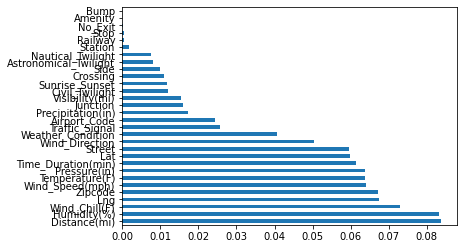

Feature ranking:
1. feature Time_Duration(min) (0.151)
2. feature Distance(mi) (0.119)
3. feature Zipcode (0.076)
4. feature Lat (0.070)
5. feature Street (0.063)
6. feature Humidity(%) (0.062)
7. feature Lng (0.059)
8. feature Pressure(in) (0.056)
9. feature Temperature(F) (0.055)
10. feature Wind_Chill(F) (0.055)
11. feature Wind_Speed(mph) (0.045)
12. feature Wind_Direction (0.042)
13. feature Weather_Condition (0.040)
14. feature Traffic_Signal (0.019)
15. feature Crossing (0.015)
16. feature Junction (0.011)
17. feature Sunrise_Sunset (0.010)
18. feature Airport_Code (0.009)
19. feature Civil_Twilight (0.009)
20. feature Precipitation(in) (0.008)
21. feature Nautical_Twilight (0.006)
22. feature Astronomical_Twilight (0.006)
23. feature Visibility(mi) (0.005)
24. feature Side (0.005)
25. feature Station (0.001)
26. feature Railway (0.000)
27. feature Amenity (0.000)
28. feature Stop (0.000)
29. feature No_Exit (0.000)
30. feature Roundabout (0.000)
31. feature Give_Way (0.000)
32.

In [ ]:
# get feature importance and select top13 feature
import matplotlib.pyplot as plt  
from sklearn.ensemble import ExtraTreesClassifier

fX = X_sample.iloc[:,1:]
fy = X_sample['Severity']

model = ExtraTreesClassifier()

model.fit(fX,fy)

#okit grap of feature importances for better visualization

f = pd.Series(model.feature_importances_, index=fX.columns)
f.nlargest(30).plot(kind='barh')

plt.show()

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(fX, fy)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(fX.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, fX.columns[indices][f], importances[indices[f]]))

In [ ]:
# we are going to train and test with only 14 features (top 13 features of feature importance + 1 target feature)
# data_Orlando_test: the dataset we are going to use
data_Orlando_test = data_Orlando.loc[:, ['Severity', 'Distance(mi)', 'Time_Duration(min)', 'Street', 'Lng', 'Humidity(%)', 'Pressure(in)', 'Lat', 'Temperature(F)', 'Zipcode', 'Wind_Chill(F)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition']]
data_Orlando_test = data_Orlando_test.infer_objects()
data_Orlando_test

,Severity,Distance(mi),Time_Duration(min),Street,Lng,Humidity(%),Pressure(in),Lat,Temperature(F),Zipcode,Wind_Chill(F),Wind_Direction,Wind_Speed(mph),Weather_Condition
0,2,0.168,159.0,Consulate Dr,-81.405965,41.0,29.91,28.428124,85.0,32837-8359,85.0,NNW,7.0,Fair
1,2,0.099,124.0,N Orange Blossom Trl,-81.416459,84.0,29.96,28.598512,79.0,32808,79.0,E,7.0,Light Rain
2,2,0.392,51.0,S Semoran Blvd,-81.310088,74.0,29.95,28.490828,78.0,32822-1732,78.0,SE,7.0,Fair
3,2,0.063,153.0,Bel Air Ave,-81.322771,51.0,29.78,28.524242,73.0,32812,73.0,W,18.0,Fair
4,2,0.028,91.0,Fredrica Dr,-81.318430,90.0,29.63,28.524279,66.0,32812,66.0,NW,12.0,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10933,2,0.000,29.0,Ten Point Ln,-81.404610,77.0,29.89,28.377640,79.0,32837,79.0,SW,6.0,Mostly Cloudy
10934,2,0.538,26.0,N Orange Blossom Trl,-81.444354,87.0,29.98,28.622242,80.0,32810,80.0,CALM,0.0,Fair
10936,2,0.223,149.0,World Center Dr,-81.496432,56.0,29.94,28.357495,84.0,32821-5407,84.0,WSW,8.0,Fair
10937,2,0.080,810.0,Turkey Lake Rd,-81.477495,50.0,29.88,28.450453,74.0,32819-7423,74.0,SSW,12.0,Fair


In [ ]:
print(data_Orlando_test.shape)
print()
data_Orlando_test.dtypes

(10040, 14)



Severity                int64
Distance(mi)          float64
Time_Duration(min)    float64
Street                 object
Lng                   float64
Humidity(%)           float64
Pressure(in)          float64
Lat                   float64
Temperature(F)        float64
Zipcode                object
Wind_Chill(F)         float64
Wind_Direction         object
Wind_Speed(mph)       float64
Weather_Condition      object
dtype: object

**scaling & encoding method**<br>
min-max scaling & one-hot encoding

In [ ]:
def MinMaxSacling_OneHotEncoding(sampleData):
    from sklearn.preprocessing import MinMaxScaler
    
    # Copy original data
    df = pd.DataFrame.copy(sampleData)

    # get features with categorical type values
    df_categorical_features = sampleData.select_dtypes(include = ['object'])
    categorical_features = df_categorical_features.columns

    # encode categorical values using One Hot Encoding
    df = pd.get_dummies(df[categorical_features], drop_first=True)
  
    # get features with float type values
    df_float_features = sampleData.select_dtypes(include = ['float64'])
    float_features = df_float_features.columns

    # scale float values using MinMaxScaler
    scaler = MinMaxScaler()
    df[float_features] = scaler.fit_transform(df_float_features[float_features])

    # Lat, Lng
    df = pd.concat([df, sampleData['Lng']],axis=1)
    df = pd.concat([df, sampleData['Lat']],axis=1)

    return df

In [ ]:
minMaxOneHot = MinMaxSacling_OneHotEncoding(data_Orlando_test)
minMaxOneHot

,Street_ 26th St,Street_ 27th St,Street_ 28th St,Street_ 29th St,Street_ 33rd St,Street_ 35th St,Street_ 36th St,Street_ 37th St,Street_ 38th St,Street_ 40th St,...,Time_Duration(min),Lng,Humidity(%),Pressure(in),Lat,Temperature(F),Wind_Chill(F),Wind_Speed(mph),Lng,Lat
0,0,0,0,0,0,0,0,0,0,0,...,0.026247,0.181581,0.271605,0.750000,0.010812,0.858974,0.879121,0.250000,-81.405965,28.428124
1,0,0,0,0,0,0,0,0,0,0,...,0.020122,0.171598,0.802469,0.775510,0.026848,0.782051,0.813187,0.250000,-81.416459,28.598512
2,0,0,0,0,0,0,0,0,0,0,...,0.007349,0.272802,0.679012,0.770408,0.016713,0.769231,0.802198,0.250000,-81.310088,28.490828
3,0,0,0,0,0,0,0,0,0,0,...,0.025197,0.260735,0.395062,0.683673,0.019858,0.705128,0.747253,0.642857,-81.322771,28.524242
4,0,0,0,0,0,0,0,0,0,0,...,0.014348,0.264865,0.876543,0.607143,0.019861,0.615385,0.670330,0.428571,-81.318430,28.524279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10933,0,0,0,0,0,0,0,0,0,0,...,0.003500,0.182871,0.716049,0.739796,0.006061,0.782051,0.813187,0.214286,-81.404610,28.377640
10934,0,0,0,0,0,0,0,0,0,0,...,0.002975,0.145058,0.839506,0.785714,0.029081,0.794872,0.824176,0.000000,-81.444354,28.622242
10936,0,0,0,0,0,0,0,0,0,0,...,0.024497,0.095509,0.456790,0.765306,0.004165,0.846154,0.868132,0.285714,-81.496432,28.357495
10937,0,0,0,0,0,0,0,0,0,0,...,0.140157,0.113526,0.382716,0.734694,0.012914,0.717949,0.758242,0.428571,-81.477495,28.450453


min-max scaling & label encoding

In [ ]:
def MinMaxSacling_LabelEncoding(sampleData):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import LabelEncoder
   
    # Copy original data
    df = pd.DataFrame.copy(sampleData)

    # get features with categorical type values
    df_categorical_features = sampleData.select_dtypes(include = ['object'])
    categorical_features = df_categorical_features.columns

    # encode categorical values using Label Encoding
    encoder = preprocessing.LabelEncoder()
    for i in range(0, 4):
        df[categorical_features[i]] = encoder.fit_transform(df[categorical_features[i]])

    # get features with float type values
    df_float_features = sampleData.select_dtypes(include = ['float64'])
    float_features = df_float_features.columns
    
    # scale float values using MinMaxScaler    
    scaler = MinMaxScaler()
    df[float_features] = scaler.fit_transform(df_float_features[float_features])
    
    # Lat, Lng
    df = pd.concat([df, sampleData['Lng']],axis=1)
    df = pd.concat([df, sampleData['Lat']],axis=1)

    return df

In [ ]:
minMaxLabel = MinMaxSacling_LabelEncoding(data_Orlando_test)
minMaxLabel

,Severity,Distance(mi),Time_Duration(min),Street,Lng,Humidity(%),Pressure(in),Lat,Temperature(F),Zipcode,Wind_Chill(F),Wind_Direction,Wind_Speed(mph),Weather_Condition,Lng,Lat
0,2,0.016342,0.026247,116,0.181581,0.271605,0.750000,0.010812,0.858974,1392,0.879121,8,0.250000,3,-81.405965,28.428124
1,2,0.009630,0.020122,408,0.171598,0.802469,0.775510,0.026848,0.782051,463,0.813187,1,0.250000,12,-81.416459,28.598512
2,2,0.038132,0.007349,531,0.272802,0.679012,0.770408,0.016713,0.769231,1067,0.802198,12,0.250000,3,-81.310088,28.490828
3,2,0.006128,0.025197,727,0.260735,0.395062,0.683673,0.019858,0.705128,773,0.747253,19,0.642857,3,-81.322771,28.524242
4,2,0.002724,0.014348,824,0.264865,0.876543,0.607143,0.019861,0.615385,773,0.670330,9,0.428571,1,-81.318430,28.524279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10933,2,0.000000,0.003500,590,0.182871,0.716049,0.739796,0.006061,0.782051,1351,0.813187,15,0.214286,18,-81.404610,28.377640
10934,2,0.052335,0.002975,408,0.145058,0.839506,0.785714,0.029081,0.794872,663,0.824176,0,0.000000,3,-81.444354,28.622242
10936,2,0.021693,0.024497,695,0.095509,0.456790,0.765306,0.004165,0.846154,1030,0.868132,21,0.285714,3,-81.496432,28.357495
10937,2,0.007782,0.140157,609,0.113526,0.382716,0.734694,0.012914,0.717949,953,0.758242,14,0.428571,3,-81.477495,28.450453


standard scaling & one-hot encoding

In [ ]:
def standard_one_hot(data):
    #copy data to s_o
    s_o=pd.DataFrame.copy(data)

    #select float type columns
    df_float = s_o.select_dtypes(include=['float64'])
    float_features = df_float.columns

    #Standard scale
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    #fit float features to standard Scaler
    s_o[float_features] = scaler.fit_transform(df_float[float_features])
    
    #select object type columns to encode
    df_categorical_features = s_o.select_dtypes(include = ['object'])
    categorical_features = df_categorical_features.columns
    s_o=pd.get_dummies(s_o[categorical_features],drop_first=True)
    
    #Lat and Lng have similar value in each column so exclude from scaling
    s_o[['Lat']] = data[['Lat']]
    s_o[['Lng']] = data[['Lng']]
    return s_o

In [ ]:
standard_one_hot(data_Orlando_test)

,Street_ 26th St,Street_ 27th St,Street_ 28th St,Street_ 29th St,Street_ 33rd St,Street_ 35th St,Street_ 36th St,Street_ 37th St,Street_ 38th St,Street_ 40th St,...,Weather_Condition_Shallow Fog,Weather_Condition_Smoke,Weather_Condition_T-Storm,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Lat,Lng
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.428124,-81.405965
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.598512,-81.416459
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.490828,-81.310088
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.524242,-81.322771
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.524279,-81.318430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.377640,-81.404610
10934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.622242,-81.444354
10936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.357495,-81.496432
10937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.450453,-81.477495


standard scaling & label encoding

In [ ]:
def standard_label(data):
    from sklearn import preprocessing
    #copy data to s_l
    s_l=pd.DataFrame.copy(data)

    #select object type columns to encode
    df_categorical_features = s_l.select_dtypes(include = ['object'])
    categorical_features = df_categorical_features.columns
    
    #Label encoding
    le = preprocessing.LabelEncoder()
    for i in range(len(categorical_features)):
        s_l[categorical_features[i]] = le.fit_transform(s_l[categorical_features[i]])

    #select float type columns
    df_float = s_l.select_dtypes(include=['float64'])
    float_features = df_float.columns

    #Standard scale
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    s_l[float_features] = scaler.fit_transform(df_float[float_features])

    #Lat and Lng have similar value in each column so exclude from scaling
    s_l[['Lat']] = data[['Lat']]
    s_l[['Lng']] = data[['Lng']]
    
    return s_l

In [ ]:
standard_label(data_Orlando_test)

,Severity,Distance(mi),Time_Duration(min),Street,Lng,Humidity(%),Pressure(in),Lat,Temperature(F),Zipcode,Wind_Chill(F),Wind_Direction,Wind_Speed(mph),Weather_Condition
0,2,-0.208581,-0.190750,116,-81.405965,-1.549925,-0.213927,28.428124,0.935953,1392,0.928881,8,-0.288542,3
1,2,-0.347276,-0.294035,408,-81.416459,0.892133,0.165012,28.598512,0.317345,463,0.316888,1,-0.288542,12
2,2,0.241675,-0.509459,531,-81.310088,0.324212,0.089224,28.490828,0.214244,1067,0.214889,12,-0.288542,3
3,2,-0.419639,-0.208456,727,-81.322771,-0.982004,-1.199170,28.524242,-0.301262,773,-0.295105,19,2.106974,3
4,2,-0.489992,-0.391419,824,-81.318430,1.232885,-2.335989,28.524279,-1.022971,773,-1.009096,9,0.800329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10933,2,-0.546274,-0.574381,590,-81.404610,0.494589,-0.365503,28.377640,0.317345,1351,0.316888,15,-0.506316,18
10934,2,0.535146,-0.583234,408,-81.444354,1.062509,0.316588,28.622242,0.420447,663,0.418887,0,-1.812962,3
10936,2,-0.098027,-0.220260,695,-81.496432,-0.698044,0.013437,28.357495,0.832851,1030,0.826882,21,-0.070768,3
10937,2,-0.385468,1.730360,609,-81.477495,-1.038797,-0.441291,28.450453,-0.198161,953,-0.193106,14,0.800329,3


robust scaling & one-hot encoding

In [ ]:
def robust_oneHot(data):
  from sklearn import preprocessing
  
  # se_data: copied data where the data to be scaled and encoded will be stored
  se_data = pd.DataFrame.copy(data)

  # get features with float type values
  df_float = se_data.select_dtypes(include = ['float64'])
  float_features = df_float.columns

  # scale float values using Robust Scaler
  rs = preprocessing.RobustScaler()
  se_data[float_features] = rs.fit_transform(df_float[float_features])

  # Latitude and Longitude are not scaled
  se_data[['Lat']] = data[['Lat']]
  se_data[['Lng']] = data[['Lng']]

  # get features with categorical type values
  df_categorical = se_data.select_dtypes(include = ['object'])
  categorical_features = df_categorical.columns

  # encode categorical values using One Hot Encoding
  se_data = pd.get_dummies(se_data[categorical_features])

  return se_data

In [ ]:
robust_oneHot(data_Orlando_test)

,Street_ 22nd St,Street_ 26th St,Street_ 27th St,Street_ 28th St,Street_ 29th St,Street_ 33rd St,Street_ 35th St,Street_ 36th St,Street_ 37th St,Street_ 38th St,...,Weather_Condition_Rain / Windy,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Smoke,Weather_Condition_T-Storm,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


robust scaling & label encoding

In [ ]:
def robust_label(data):
  from sklearn import preprocessing

  # se_data: copied data where the data to be scaled and encoded will be stored
  se_data = pd.DataFrame.copy(data)

  # get features with float type values
  df_float = se_data.select_dtypes(include = ['float64'])
  float_features = df_float.columns

  # scale float values using Robust Scaler
  rs = preprocessing.RobustScaler()
  se_data[float_features] = rs.fit_transform(df_float[float_features])

  # Latitude and Longitude are not scaled
  se_data[['Lat']] = data[['Lat']]
  se_data[['Lng']] = data[['Lng']]

  # get features with categorical type values
  df_categorical = se_data.select_dtypes(include = ['object'])
  categorical_features = df_categorical.columns

  # encode categorical values using Label Encoder
  le = preprocessing.LabelEncoder()
  for i in range(len(categorical_features)):
    se_data[categorical_features[i]] = le.fit_transform(se_data[categorical_features[i]])
  
  return se_data

In [ ]:
robust_label(data_Orlando_test)

,Severity,Distance(mi),Time_Duration(min),Street,Lng,Humidity(%),Pressure(in),Lat,Temperature(F),Zipcode,Wind_Chill(F),Wind_Direction,Wind_Speed(mph),Weather_Condition
0,2,0.172414,0.343434,116,-81.405965,-0.900000,-0.200000,28.428124,0.615385,1392,0.615385,8,-0.166667,3
1,2,-0.224138,-0.010101,408,-81.416459,0.533333,0.133333,28.598512,0.153846,463,0.153846,1,-0.166667,12
2,2,1.459770,-0.747475,531,-81.310088,0.200000,0.066667,28.490828,0.076923,1067,0.076923,12,-0.166667,3
3,2,-0.431034,0.282828,727,-81.322771,-0.566667,-1.066667,28.524242,-0.307692,773,-0.307692,19,1.666667,3
4,2,-0.632184,-0.343434,824,-81.318430,0.733333,-2.066667,28.524279,-0.846154,773,-0.846154,9,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10933,2,-0.793103,-0.969697,590,-81.404610,0.300000,-0.333333,28.377640,0.153846,1351,0.153846,15,-0.333333,18
10934,2,2.298851,-1.000000,408,-81.444354,0.633333,0.266667,28.622242,0.230769,663,0.230769,0,-1.333333,3
10936,2,0.488506,0.242424,695,-81.496432,-0.400000,0.000000,28.357495,0.538462,1030,0.538462,21,0.000000,3
10937,2,-0.333333,6.919192,609,-81.477495,-0.600000,-0.400000,28.450453,-0.230769,953,-0.230769,14,0.666667,3


## **Data Analysis (Modeling) + Evaluation**

### Linear Regression

In [ ]:
def Linear_Regression(df, X, y):
  from sklearn.linear_model import LinearRegression
  from sklearn.model_selection import train_test_split
  import matplotlib.pyplot as plt

  X = df[X].values.reshape(-1,1)
  y = df[y].values

  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

  #create model & train model
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)

  # scorer
  score = model.score(X_test, y_test)

  # print & draw
  print("Socre: " + str(score))
  print("coef_ : " + str(model.coef_))
  print("intercept_ : " + str(model.intercept_))

  plt.plot(X_test, y_predict)

  plt.show()


Humidity

<Robust Scaling + Label Encoding>
Socre: 0.003565081239955026
coef_ : [0.01870389]
intercept_ : 2.0186782784755914


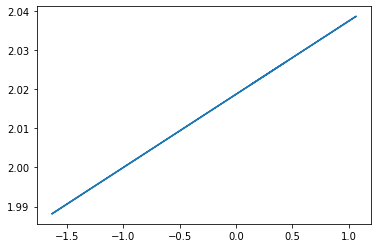


<Min-Max Scaling + Label Encoding>
Socre: 0.003565081239955026
coef_ : [0.05050051]
intercept_ : 1.9881285872933339


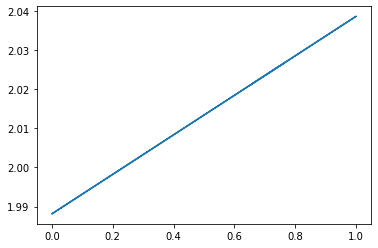


<Standard Scaling + Label Encoding>
Socre: 0.003565081239955137
coef_ : [0.0111111]
intercept_ : 2.0188219584905744


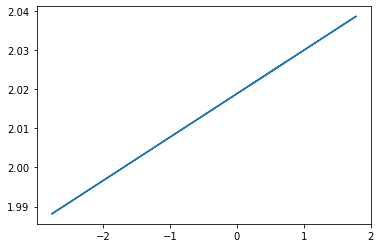

In [ ]:
print("<Robust Scaling + Label Encoding>")
Linear_Regression(robust_label(data_Orlando_test), 'Humidity(%)', 'Severity')
print()

print("<Min-Max Scaling + Label Encoding>")
Linear_Regression(MinMaxSacling_LabelEncoding(data_Orlando_test), 'Humidity(%)', 'Severity')
print()

print("<Standard Scaling + Label Encoding>")
Linear_Regression(standard_label(data_Orlando_test), 'Humidity(%)', 'Severity')

Temperature

<Robust Scaling + Label Encoding>
Socre: -0.00029245841314451404
coef_ : [-0.00266832]
intercept_ : 2.0185136348317143


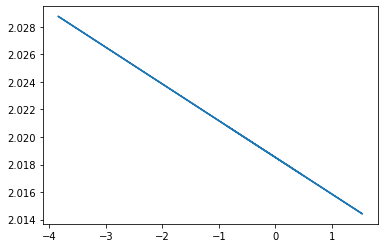


<Min-Max Scaling + Label Encoding>
Socre: -0.00029245841314451404
coef_ : [-0.01703617]
intercept_ : 2.031444704935342


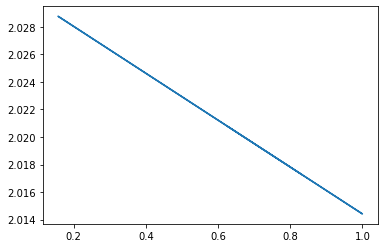


<Standard Scaling + Label Encoding>
Socre: -0.00029245841314451404
coef_ : [-0.00200189]
intercept_ : 2.0187994118003085


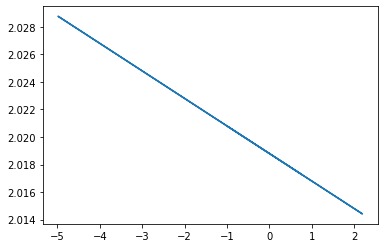

In [ ]:
print("<Robust Scaling + Label Encoding>")
Linear_Regression(robust_label(data_Orlando_test), 'Temperature(F)', 'Severity')
print()

print("<Min-Max Scaling + Label Encoding>")
Linear_Regression(MinMaxSacling_LabelEncoding(data_Orlando_test), 'Temperature(F)', 'Severity')
print()

print("<Standard Scaling + Label Encoding>")
Linear_Regression(standard_label(data_Orlando_test), 'Temperature(F)', 'Severity')

Wind Chill

<Robust Scaling + Label Encoding>
Socre: -0.0002948379103622223
coef_ : [-0.00284319]
intercept_ : 2.018484559224663


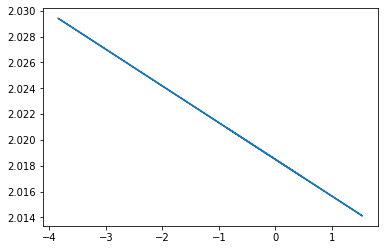


<Min-Max Scaling + Label Encoding>
Socre: -0.0002948379103617782
coef_ : [-0.02121456]
intercept_ : 2.0353249797767408


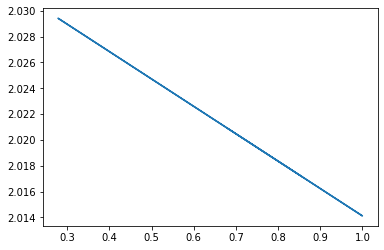


<Standard Scaling + Label Encoding>
Socre: -0.00029483791036200024
coef_ : [-0.00216676]
intercept_ : 2.0187984867385675


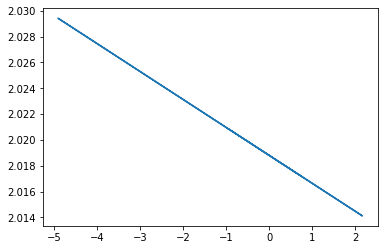

In [ ]:
print("<Robust Scaling + Label Encoding>")
Linear_Regression(robust_label(data_Orlando_test), 'Wind_Chill(F)', 'Severity')
print()

print("<Min-Max Scaling + Label Encoding>")
Linear_Regression(MinMaxSacling_LabelEncoding(data_Orlando_test), 'Wind_Chill(F)', 'Severity')
print()

print("<Standard Scaling + Label Encoding>")
Linear_Regression(standard_label(data_Orlando_test), 'Wind_Chill(F)', 'Severity')

Distance

<Robust Scaling + Label Encoding>
Socre: -0.0025803898349665566
coef_ : [0.01256999]
intercept_ : 2.009435108574747


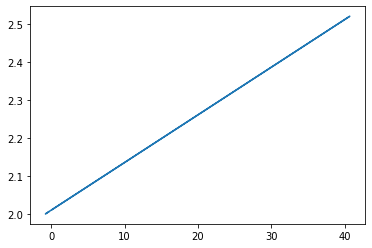


<Min-Max Scaling + Label Encoding>
Socre: -0.0025803898349665566
coef_ : [0.55656713]
intercept_ : 1.9995534989144146


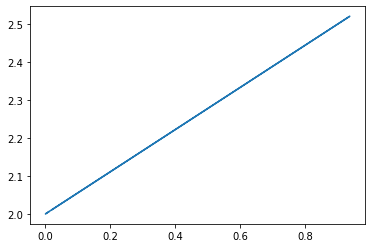


<Standard Scaling + Label Encoding>
Socre: -0.0025803898349665566
coef_ : [0.03500795]
intercept_ : 2.0189928325903064


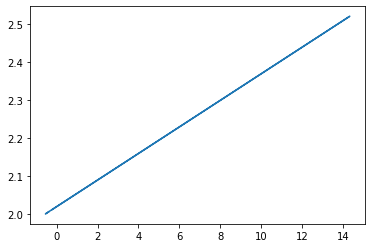

In [ ]:
print("<Robust Scaling + Label Encoding>")
Linear_Regression(robust_label(data_Orlando_test), 'Distance(mi)', 'Severity')
print()

print("<Min-Max Scaling + Label Encoding>")
Linear_Regression(MinMaxSacling_LabelEncoding(data_Orlando_test), 'Distance(mi)', 'Severity')
print()

print("<Standard Scaling + Label Encoding>")
Linear_Regression(standard_label(data_Orlando_test), 'Distance(mi)', 'Severity')

Time Duration

<Robust Scaling + Label Encoding>
Socre: 0.0007370636538795994
coef_ : [-0.00149057]
intercept_ : 2.0203877593236035


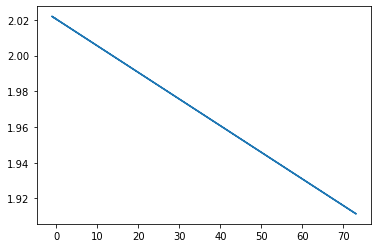


<Min-Max Scaling + Label Encoding>
Socre: 0.0007370636538797104
coef_ : [-0.11081402]
intercept_ : 2.0221794533840565


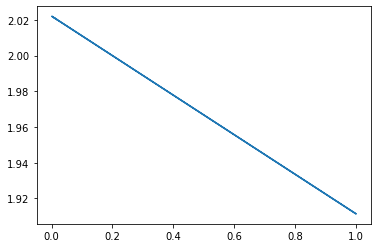


<Standard Scaling + Label Encoding>
Socre: 0.0007370636538795994
coef_ : [-0.00549241]
intercept_ : 2.0188356260371094


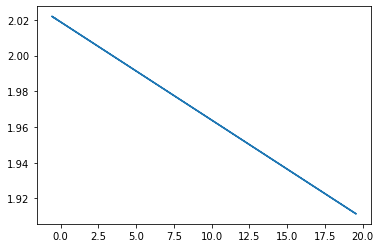

In [ ]:
print("<Robust Scaling + Label Encoding>")
Linear_Regression(robust_label(data_Orlando_test), 'Time_Duration(min)', 'Severity')
print()

print("<Min-Max Scaling + Label Encoding>")
Linear_Regression(MinMaxSacling_LabelEncoding(data_Orlando_test), 'Time_Duration(min)', 'Severity')
print()

print("<Standard Scaling + Label Encoding>")
Linear_Regression(standard_label(data_Orlando_test), 'Time_Duration(min)', 'Severity')

Weather Condition

<Robust Scaling + Label Encoding>
Socre: -0.00041600259316676436
coef_ : [-1.33875062e-05]
intercept_ : 2.018946215467788


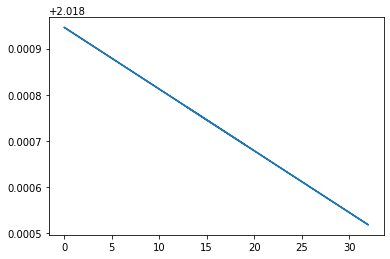


<Min-Max Scaling + Label Encoding>
Socre: -0.00041600259316676436
coef_ : [-1.33875062e-05]
intercept_ : 2.018946215467788


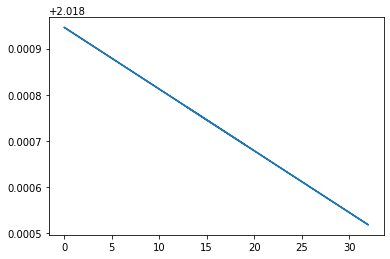


<Standard Scaling + Label Encoding>
Socre: -0.00041600259316676436
coef_ : [-1.33875062e-05]
intercept_ : 2.018946215467788


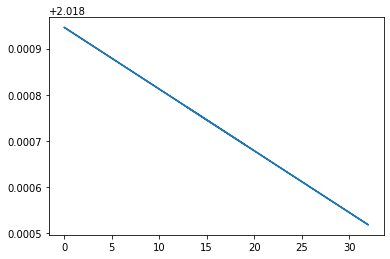

In [ ]:
print("<Robust Scaling + Label Encoding>")
Linear_Regression(robust_label(data_Orlando_test), 'Weather_Condition', 'Severity')
print()

print("<Min-Max Scaling + Label Encoding>")
Linear_Regression(MinMaxSacling_LabelEncoding(data_Orlando_test), 'Weather_Condition', 'Severity')
print()

print("<Standard Scaling + Label Encoding>")
Linear_Regression(standard_label(data_Orlando_test), 'Weather_Condition', 'Severity')

### KNN

In [ ]:
def KNN(data, target, scale_encode_method):
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.model_selection import GridSearchCV

  # create a dataframe with all training data except the target feature
  X = data.drop(columns = [target])

  X = scale_encode_method(X) # scale the data
  y = data[target].values # seperate target feature

  # split dataset into train and test data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

  # create new knn model
  knn = KNeighborsClassifier()

  # create a dictionary of all values we want to test for n_neighbors
  param_grid = {'n_neighbors': np.arange(1, 25)}

  # use GridSearch to test all values for n_neighbors
  knn_gscv = GridSearchCV(knn, param_grid, cv = 5)

  # fit model to data
  knn_gscv.fit(X_train, y_train)

  # check top performing n_neighbors value
  # print(knn_gscv.best_params_)

  # check the mean score for the top performing value of n_neighbors
  # print(knn_gscv.best_score_)

  knn2 = KNeighborsClassifier(n_neighbors = knn_gscv.best_params_.get('n_neighbors'))
  knn2.fit(X_train, y_train)
  # print(knn2.score(X_test, y_test))

  return knn_gscv.best_params_, knn2.score(X_test, y_test)

In [ ]:
def KNN_eval(data, target, scale_encode_method, knn_best_k):
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.model_selection import cross_val_score

  # create a dataframe with all training data except the target feature
  X = data.drop(columns = [target])

  X = scale_encode_method(X) # scale the data
  y = data[target].values # seperate target feature

  knn_cv = KNeighborsClassifier(n_neighbors = knn_best_k.get('n_neighbors'))
  cv_scores = cross_val_score(knn_cv, X, y, cv = 5)

  # print(cv_scores)
  # print('cv_scores mean: {}'.format(np.mean(cv_scores)))
  return cv_scores

In [ ]:
print("<Robust Scaling + Label Encoding>")
rl_knn_best_k, rl_knn_test_score = KNN(data_Orlando_test, 'Severity', robust_label)
print(rl_knn_best_k)
print('accuracy: {}'.format(rl_knn_test_score))

print('\nk-fold cross validation')
rl_cv_scores = KNN_eval(data_Orlando_test, 'Severity', robust_label, rl_knn_best_k)
print(rl_cv_scores)
print('mean accuracy: {}'.format(np.mean(rl_cv_scores)))

<Robust Scaling + Label Encoding>
{'n_neighbors': 7}
accuracy: 0.9736187157789945

k-fold cross validation
[0.97361872 0.97312096 0.97361872 0.97361872 0.97360558]
mean accuracy: 0.9735165361451159


In [ ]:
print("<Min-Max Scaling + Label Encoding>")
mml_knn_best_k, mml_knn_test_score = KNN(data_Orlando_test, 'Severity', MinMaxSacling_LabelEncoding)
print(mml_knn_best_k)
print('accuracy: {}'.format(mml_knn_test_score))

print('\nk-fold cross validation')
mml_cv_scores = KNN_eval(data_Orlando_test, 'Severity', MinMaxSacling_LabelEncoding, mml_knn_best_k)
print(mml_cv_scores)
print('mean accuracy: {}'.format(np.mean(mml_cv_scores)))

<Min-Max Scaling + Label Encoding>
{'n_neighbors': 10}
accuracy: 0.9730538922155688

k-fold cross validation
[0.97355289 0.97355289 0.97403894 0.97403894 0.97304044]
mean accuracy: 0.9736448221878758


In [ ]:
print("<Standard Scaling + Label Encoding>")
sl_knn_best_k, sl_knn_test_score = KNN(data_Orlando_test, 'Severity', standard_label)
print(sl_knn_best_k)
print('accuracy: {}'.format(sl_knn_test_score))

print('\nk-fold cross validation')
sl_cv_scores = KNN_eval(data_Orlando_test, 'Severity', standard_label, sl_knn_best_k)
print(sl_cv_scores)
print('mean accuracy: {}'.format(np.mean(sl_cv_scores)))

<Standard Scaling + Label Encoding>
{'n_neighbors': 15}
accuracy: 0.974090682610862

k-fold cross validation
[0.97409068 0.97409068 0.97407777 0.97407777 0.97407777]
mean accuracy: 0.974082933064285


In [ ]:
print("<Robust Scaling + One-Hot Encoding>")
roh_knn_best_k, roh_knn_test_score = KNN(data_Orlando_test, 'Severity', robust_oneHot)
print(roh_knn_best_k)
print('accuracy: {}'.format(roh_knn_test_score))

print('\nk-fold cross validation')
roh_cv_scores = KNN_eval(data_Orlando_test, 'Severity', robust_oneHot, roh_knn_best_k)
print(roh_cv_scores)
print('mean accuracy: {}'.format(np.mean(roh_cv_scores)))

<Robust Scaling + One-Hot Encoding>
{'n_neighbors': 5}
accuracy: 0.9736711376055638

k-fold cross validation
[0.97317437 0.9726776  0.97367114 0.9726776  0.97415507]
mean accuracy: 0.9732711530123778


In [ ]:
print("<Min-Max Scaling + One-Hot Encoding>")
mmoh_knn_best_k, mmoh_knn_test_score = KNN(data_Orlando_test, 'Severity', MinMaxSacling_OneHotEncoding)
print(mmoh_knn_best_k)
print('accuracy: {}'.format(mmoh_knn_test_score))

print('\nk-fold cross validation')
mmoh_cv_scores = KNN_eval(data_Orlando_test, 'Severity', MinMaxSacling_OneHotEncoding, mmoh_knn_best_k)
print(mmoh_cv_scores)
print('mean accuracy: {}'.format(np.mean(mmoh_cv_scores)))

<Min-Max Scaling + One-Hot Encoding>
{'n_neighbors': 7}
accuracy: 0.973

k-fold cross validation
[0.973      0.973      0.973      0.9725     0.97298649]
mean accuracy: 0.9728972986493247


In [ ]:
print("<Standard Scaling + One-Hot Encoding>")
soh_knn_best_k, soh_knn_test_score = KNN(data_Orlando_test, 'Severity', standard_one_hot)
print(soh_knn_best_k)
print('accuracy: {}'.format(soh_knn_test_score))

print('\nk-fold cross validation')
soh_cv_scores = KNN_eval(data_Orlando_test, 'Severity', standard_one_hot, soh_knn_best_k)
print(soh_cv_scores)
print('mean accuracy: {}'.format(np.mean(soh_cv_scores)))

<Standard Scaling + One-Hot Encoding>
{'n_neighbors': 8}
accuracy: 0.9741035856573705

k-fold cross validation
[0.97410359 0.97410359 0.97410359 0.97360558 0.97360558]
mean accuracy: 0.9739043824701195


### Decision Tree Clssifier

In [ ]:
def decision_tree(data):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import tree

    dp=pd.DataFrame.copy(data)
    #data
    X = dp.iloc[:, 1:].values
    #target
    y = data_Orlando_test['Severity'].values

    #split data train,test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify=y,random_state=1)
    #use decisiontree
    tree_model = DecisionTreeClassifier()
    #fit to model
    tree_model.fit(X_train,y_train)
    #check score
    print("Train Set Score:{:.2f}".format(tree_model.score(X_train,y_train)))
    print("test Set Score:{:.2f}".format(tree_model.score(X_test,y_test)))

In [ ]:
print("<Robust Scaling + Label Encoding>")
decision_tree(robust_label(data_Orlando_test))
print()

print("<Min-Max Scaling + Label Encoding>")
decision_tree(MinMaxSacling_LabelEncoding(data_Orlando_test))
print()

print("<Standard Scaling + Label Encoding>")
decision_tree(standard_label(data_Orlando_test))
print()

print("<Robust Scaling + One-Hot Encoding>")
decision_tree(robust_oneHot(data_Orlando_test))
print()

print("<Min-Max Scaling + One-Hot Encoding>")
decision_tree(MinMaxSacling_OneHotEncoding(data_Orlando_test))
print()

print("<Standard Scaling + One-Hot Encoding>")
decision_tree(standard_one_hot(data_Orlando_test))

<Robust Scaling + Label Encoding>
Train Set Score:1.00
test Set Score:0.96

<Min-Max Scaling + Label Encoding>
Train Set Score:1.00
test Set Score:0.96

<Standard Scaling + Label Encoding>
Train Set Score:1.00
test Set Score:0.96

<Robust Scaling + One-Hot Encoding>
Train Set Score:1.00
test Set Score:0.96

<Min-Max Scaling + One-Hot Encoding>
Train Set Score:1.00
test Set Score:0.97

<Standard Scaling + One-Hot Encoding>
Train Set Score:1.00
test Set Score:0.96


## NOT IN CLASS

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


def LogisticRegressionFunc(df):
  # select
  X = df.iloc[:, :-1].values
  y = df['Severity'].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)
  
  # logistic Regression
  model = LogisticRegression(random_state = 77)

  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  acc = accuracy_score(y_test, y_predict)

  print("Logistic regression accuracy_score: {}.".format(acc))

  # confusion Matrix
  confusionMatrix = confusion_matrix(y_true = y_test, y_pred = y_predict)

  # visualization
  index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
  columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
  conf_matrix = pd.DataFrame(data=confusionMatrix, columns=columns, index=index)
  plt.figure(figsize=(8, 5))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
  plt.title("Confusion Matrix - Logistic Regression")
  plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
LogisticRegressionFunc(robust_label(data_Orlando_test))

LogisticRegressionFunc(minMaxLabel)

LogisticRegressionFunc(standard_label(data_Orlando_test))

**SVM**

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV


def svm(data):
    from sklearn import svm
    #X = data.iloc[:, :-1].values
    dp=pd.DataFrame.copy(data)
    X = dp.iloc[:, :-1].values
    y = data_Orlando_test['Severity'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify=y,random_state=1)
    svm_clf =svm.SVC(kernel = 'linear')
    svm_clf.fit(X_train,y_train)
    y_predict=svm_clf.predict(X_test)

    #grid search
    param_grid = {'C': [0.1, 1, 10, 100]}
    clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
    clf_grid.fit(X_train,y_train)
    print("Best Parameters:\n", clf_grid.best_params_)

    #find score
    scores = cross_val_score(svm_clf, X, y, cv =3 )
    return scores

In [ ]:
svm(MinMaxSacling_OneHotEncoding(data_Orlando_test))

In [ ]:
svm(MinMaxSacling_LabelEncoding(data_Orlando_test))

In [ ]:
svm(standard_one_hot(data_Orlando_test))

In [ ]:
svm(standard_label(data_Orlando_test))

In [ ]:
svm(robust_oneHot(data_Orlando_test))

In [ ]:
svm(robust_label(data_Orlando_test))